In [44]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fti=20

In [47]:
DSET="JRA55C"
INDIR="/work03/am/2023.HEAT_FLUX_DECOMP_MON/12.JRA55C/62.FLUX.DECOMP/11.00.LINK.INPUT.DATA"
MM="01"

In [48]:
VAR1="LHF"
INFILE1 = INDIR+'/'+DSET+'.'+VAR1+".TREND."+MM+".nc"

VAR2="U10MAG"
INFILE2 = INDIR+'/'+DSET+'.'+VAR2+".TREND."+MM+".nc"

VAR3="QS"
INFILE3 = INDIR+'/'+DSET+'.'+VAR3+".TREND."+MM+".nc"

VAR4="Q2"
INFILE4 = INDIR+'/'+DSET+'.'+VAR4+".TREND."+MM+".nc"

NC1 = netCDF4.Dataset(INFILE1, 'r')
NC2 = netCDF4.Dataset(INFILE2, 'r')
NC3 = netCDF4.Dataset(INFILE3, 'r')
NC4 = netCDF4.Dataset(INFILE4, 'r')

nc=NC1
nlat = len(nc.dimensions['g0_lat_1'])
nlon = len(nc.dimensions['g0_lon_2'])
lons = nc.variables['g0_lat_1'][:]
lats = nc.variables['g0_lon_2'][:]

In [49]:
TIME="START"

In [50]:
LHF = NC1.variables['START'][:]
U10MAG = NC2.variables['START'][:]
QS = NC3.variables['START'][:]
Q2 = NC4.variables['START'][:]


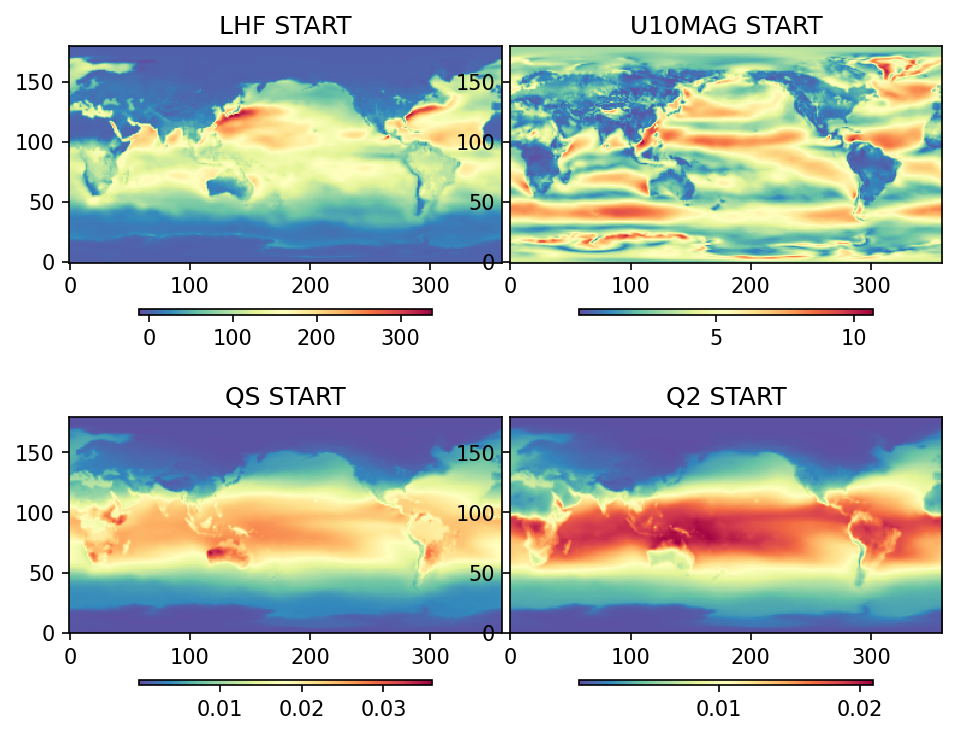

In [56]:
grid1 = LHF.reshape((nlat, nlon))
grid2 = U10MAG.reshape((nlat, nlon))
grid3 = QS.reshape((nlat, nlon))
grid4 = Q2.reshape((nlat, nlon))

fti=12

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(8, 6),dpi=150)

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plt.subplots_adjust(wspace=-0.1, hspace=0.2)

img1=ax1.imshow(grid1, interpolation='nearest', cmap=cm.Spectral_r)
ax1.set_title(VAR1+" "+TIME,loc='center',fontsize=fti)
cbar1 = fig.colorbar(img1,ax=ax1,aspect=50,pad=0.15,shrink=0.6,orientation='horizontal')

img2=ax2.imshow(grid2, interpolation='nearest', cmap=cm.Spectral_r)
ax2.set_title(VAR2+" "+TIME,loc='center',fontsize=fti)
cbar2 = fig.colorbar(img2,ax=ax2,aspect=50,pad=0.15,shrink=0.6,orientation='horizontal')

img3=ax3.imshow(grid3, interpolation='nearest', cmap=cm.Spectral_r)
ax3.set_title(VAR3+" "+TIME,loc='center',fontsize=fti)
cbar3 = fig.colorbar(img3,ax=ax3,aspect=50,pad=0.15,shrink=0.6,orientation='horizontal')

img4=ax4.imshow(grid4, interpolation='nearest', cmap=cm.Spectral_r)
ax4.set_title(VAR4+" "+TIME,loc='center',fontsize=fti)
cbar4 = fig.colorbar(img4,ax=ax4,aspect=50,pad=0.15,shrink=0.6,orientation='horizontal')

ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

fig.savefig("00."+DSET+".RHO_L_CE_BAR_INPUT"+MM+".pdf", facecolor="white")

$$
\rho_a L C_e = \frac{\bar{Q}}{\bar{W}(\bar{q}_s-\bar{q}_a)}
$$

In [57]:
BULKCOEF=LHF/(U10MAG*(QS-Q2))

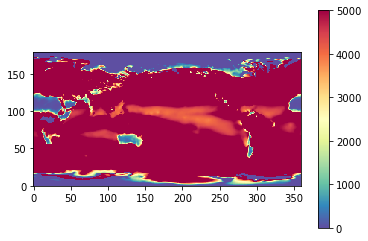

In [58]:
grid = BULKCOEF.reshape((nlat, nlon))

fig, ax1 = plt.subplots(1, 1)

im=plt.imshow(grid, interpolation='nearest', cmap=cm.Spectral_r)

plt.clim(0, 5E3) 


ax1.invert_yaxis()

fig.colorbar(im)

fig.savefig("00."+DSET+".BULKCOEF"+MM+".pdf", facecolor="white")

In [31]:
rhoa=1.2
L=2.5E6
CE=1.6E-3
BULKCOEF_ORDER=rhoa*L*CE
print("BULKCOEF_ORDER=",BULKCOEF_ORDER)

print("Latent heat of vaporization at 0[C] = 2.5E6 [J/kg]" )
print("CE = 1.6E-3")

BULKCOEF_ORDER= 4800.0
Latent heat of vaporization at 0[C] = 2.5E6 [J/kg]
CE = 1.6E-3


In [32]:
nc.dimensions

{'g0_lat_1': <class 'netCDF4._netCDF4.Dimension'>: name = 'g0_lat_1', size = 180,
 'g0_lon_2': <class 'netCDF4._netCDF4.Dimension'>: name = 'g0_lon_2', size = 360}

In [33]:
nc.variables.keys()

dict_keys(['START', 'g0_lat_1', 'g0_lon_2', 'FINISH', 'DIFF'])

In [34]:
nc['START']

<class 'netCDF4._netCDF4.Variable'>
float32 START(g0_lat_1, g0_lon_2)
    year: 1980.0
    long_name: Latent heat flux
    units: W/m^2
    _FillValue: 1e+20
    missing_value: 1e+20
    sub_center: 241
    center: Japanese Meteorological Agency - Tokyo (RSMC)
    level_indicator: 1
    gds_grid_type: 0
    parameter_table_version: 200
    parameter_number: 121
    forecast_time: 0
    forecast_time_units: hours
    statistical_process_descriptor: average of N forecast products; valid time of equal specified duration with all N products covering a continuous time span.
    statistical_process_duration: 6 hours (beginning at reference time)
    N: [120 124]
unlimited dimensions: 
current shape = (180, 360)
filling on

In [35]:
nc['g0_lat_1']

<class 'netCDF4._netCDF4.Variable'>
float32 g0_lat_1(g0_lat_1)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [36]:
import netCDF4
from numpy import dtype

# オブジェクトを作成し，各次元数を設定します．

OFLE='21.00.RHO_L_CE_BAR.nc'

nc = netCDF4.Dataset(OFLE, 'w', format='NETCDF3_CLASSIC')

#nc.createDimension('ntime', len(time_out))  # e.g. time_out = [0, 1, ...]
# nc.createDimensions('ntime', None)        # unlimitedにする場合

#nlat = len(nc.dimensions['g0_lat_0'])
#nlon = len(nc.dimensions['g0_lon_1'])
#lons = nc.variables['g0_lat_0'][:]
#lats = nc.variables['g0_lon_1'][:]

nc.createDimension('g0_lat_1', nlat)
nc.createDimension('g0_lon_2', nlon)

# その後，各変数を定義します．
# 以下の例では，時間，緯度，経度，3次元変数を定義します．

#time = nc.createVariable('time', dtype('int32').char, ('ntime',))
#time.long_name = 'time of test variable'
#time.units = 'days since 1968-05-23 00:00:00'

LATOUT = nc.createVariable('g0_lat_1', dtype('float32').char, 'g0_lat_1')
LATOUT.long_name = 'north latitude'
LATOUT.units = 'degree of north latitude'

LONOUT = nc.createVariable('g0_lon_2', dtype('float32').char, 'g0_lon_2')
LONOUT.long_name = 'east longitude'
LONOUT.units = 'degree of east longitude'

VAROUT = nc.createVariable('BULKCOEF', dtype('float32').char, ('g0_lat_1','g0_lon_2'))
VAROUT.long_name = 'rho_a x L x Ce'
VAROUT.units = 'non dimensional'

# 最後に，予め np.ndarray 等で作成しておいた値を代入します．

#print(LATOUT)

LATOUT = lats
LONOUT = lons

VAROUT[:,:] = BULKCOEF #.reshape((nlat, nlon))

nc.close()